In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv("Combined_Soil_Moisture_Data_California.csv")
df

,Date,Latitude,Longitude,Soil_Moisture
0,01/01/2020,42.154439,-119.484991,0.242120
1,01/01/2020,42.154439,-119.404142,0.208612
2,01/01/2020,42.154439,-119.323294,0.225763
3,01/01/2020,42.154439,-119.242446,0.233575
4,01/01/2020,42.154439,-119.161597,0.234979
...,...,...,...,...
20079217,01/10/2024,32.533779,-114.472021,0.097031
20079218,01/10/2024,32.533779,-114.391172,0.160031
20079219,01/10/2024,32.533779,-114.310323,0.125719
20079220,01/10/2024,32.533779,-114.229475,0.111660


In [ ]:
df = pd.read_csv("Combined_Soil_Moisture_Data_California.csv")
df

In [20]:
import numpy as np
import pandas as pd

# Load your dataset
df = pd.read_csv('Combined_Soil_Moisture_Data_California.csv', parse_dates=['Date'], dayfirst=True)

# Define the latitude and longitude of the specific region you want to extract
target_latitude = 42.154439 # Replace with the latitude you're interested in
target_longitude = -119.161597  # Replace with the longitude you're interested in

# Set a tolerance for comparing latitude and longitude values (for floating-point precision)
tolerance = 1e-4

# Filter the data with a tolerance for latitude and longitude precision
specific_region_data = df[
    (np.isclose(df['Latitude'], target_latitude, atol=tolerance)) &
    (np.isclose(df['Longitude'], target_longitude, atol=tolerance))
]

# Check the first few rows to ensure correct filtering
print(specific_region_data.head())

# Save the filtered data to a new CSV file
if not specific_region_data.empty:
    specific_region_data.to_csv('specific_region_data.csv', index=False)
    print(f"Data for Latitude {target_latitude} and Longitude {target_longitude} has been saved to 'specific_region_data.csv'")
else:
    print(f"No data found for Latitude {target_latitude} and Longitude {target_longitude}.")


            Date   Latitude   Longitude  Soil_Moisture
4     2020-01-01  42.154439 -119.161597       0.234979
11517 2020-01-02  42.154439 -119.161597       0.233168
23030 2020-01-03  42.154439 -119.161597       0.233806
34543 2020-01-04  42.154439 -119.161597       0.237789
46056 2020-01-05  42.154439 -119.161597       0.238714
Data for Latitude 42.154439 and Longitude -119.161597 has been saved to 'specific_region_data.csv'


In [32]:
dd = pd.read_csv("specific_region_data.csv")

In [33]:
dd

,Date,Latitude,Longitude,Soil_Moisture
0,2020-01-01,42.154439,-119.161597,0.234979
1,2020-01-02,42.154439,-119.161597,0.233168
2,2020-01-03,42.154439,-119.161597,0.233806
3,2020-01-04,42.154439,-119.161597,0.237789
4,2020-01-05,42.154439,-119.161597,0.238714
...,...,...,...,...
1739,2024-09-27,42.154681,-119.161253,0.276903
1740,2024-09-28,42.154681,-119.161253,0.276044
1741,2024-09-29,42.154681,-119.161253,0.275907
1742,2024-09-30,42.154681,-119.161253,0.275869


In [34]:
dd.columns

Index(['Date', 'Latitude', 'Longitude', 'Soil_Moisture'], dtype='object')

In [35]:
dd = dd.drop_duplicates(subset='Date', keep="first")
dd

,Date,Latitude,Longitude,Soil_Moisture
0,2020-01-01,42.154439,-119.161597,0.234979
1,2020-01-02,42.154439,-119.161597,0.233168
2,2020-01-03,42.154439,-119.161597,0.233806
3,2020-01-04,42.154439,-119.161597,0.237789
4,2020-01-05,42.154439,-119.161597,0.238714
...,...,...,...,...
1739,2024-09-27,42.154681,-119.161253,0.276903
1740,2024-09-28,42.154681,-119.161253,0.276044
1741,2024-09-29,42.154681,-119.161253,0.275907
1742,2024-09-30,42.154681,-119.161253,0.275869


In [36]:
def plot_seasonality_trend(region_data, region_id):
    region_data.set_index('Date', inplace=True)
    
    # Decompose the time series
    decomposition = seasonal_decompose(region_data['Soil_Moisture'], model='additive', period=365)
    
    # Plot
    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(region_data['Soil_Moisture'], label='Observed')
    plt.title(f'Region: {region_id} - Soil Moisture Over Time')
    plt.legend()
    
    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend', color='orange')
    plt.title('Trend')
    plt.legend()
    
    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonality', color='green')
    plt.title('Seasonality')
    plt.legend()
    
    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residuals', color='red')
    plt.title('Residuals')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

C:\Users\asamy\AppData\Local\Temp\ipykernel_15060\1714604948.py:29: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\asamy\anaconda3\envs\tf\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


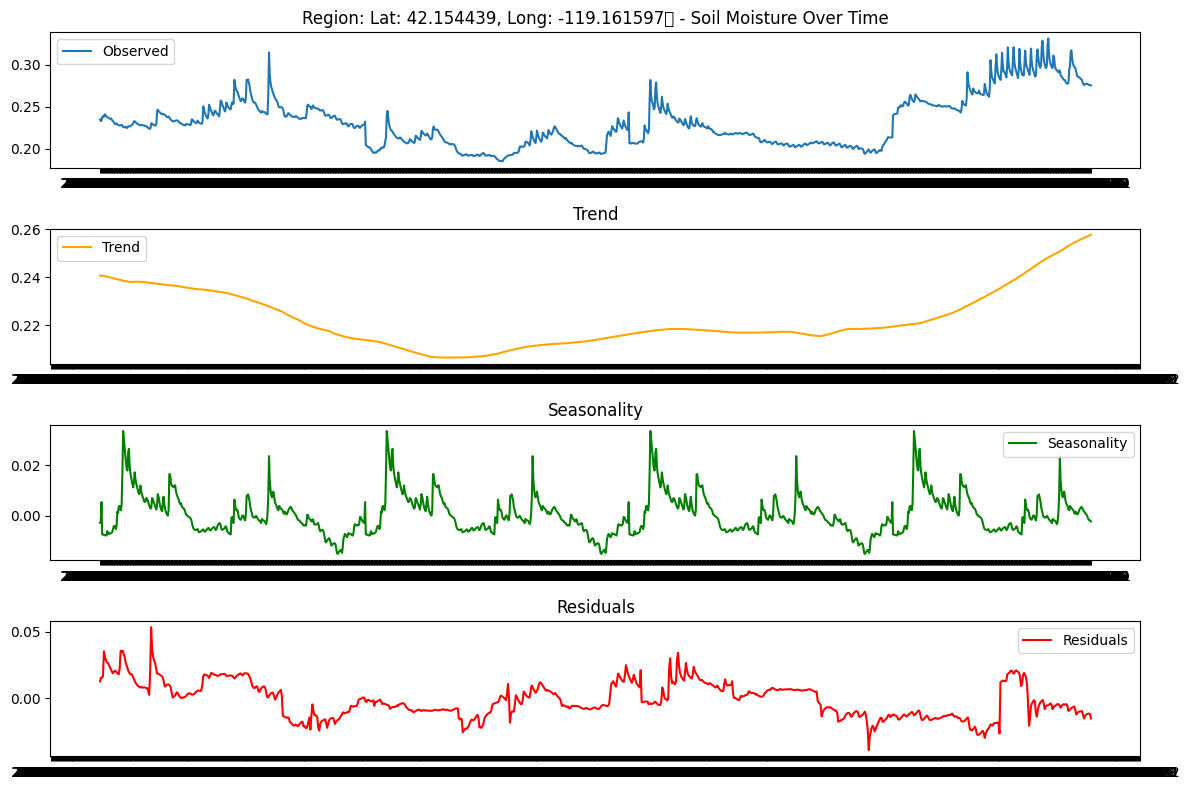

In [37]:
plot_seasonality_trend(dd, f'Lat: 42.154439, Long: -119.161597	')

In [4]:
df= df.drop_duplicates(subset=['Date', 'Latitude', 'Longitude'])
df

,Date,Latitude,Longitude,Soil_Moisture
0,01/01/2020,42.154439,-119.484991,0.242120
1,01/01/2020,42.154439,-119.404142,0.208612
2,01/01/2020,42.154439,-119.323294,0.225763
3,01/01/2020,42.154439,-119.242446,0.233575
4,01/01/2020,42.154439,-119.161597,0.234979
...,...,...,...,...
20079217,01/10/2024,32.533779,-114.472021,0.097031
20079218,01/10/2024,32.533779,-114.391172,0.160031
20079219,01/10/2024,32.533779,-114.310323,0.125719
20079220,01/10/2024,32.533779,-114.229475,0.111660


In [5]:
observation_counts = df.groupby(['Latitude', 'Longitude']).size()

unique_counts = observation_counts.unique()

if len(unique_counts) == 1:
    print(f"All regions have the same number of observations: {unique_counts[0]}")
else:
    print("Regions have different numbers of observations.")
    print("Unique counts of observations by region:", unique_counts)

Regions have different numbers of observations.
Unique counts of observations by region: [1098  275]


In [11]:
import pandas as pd

# Load your data and specify the correct date format
data = pd.read_csv('Combined_Soil_Moisture_Data_California.csv', parse_dates=['Date'], dayfirst=True)

# Group by Latitude and Longitude and count the number of observations per region
region_counts = data.groupby(['Latitude', 'Longitude']).size().reset_index(name='count')

# Find the region with the maximum number of observations (reference region)
max_observations = region_counts['count'].max()
reference_region = region_counts[region_counts['count'] == max_observations]

# Find regions with fewer observations
regions_with_missing_obs = region_counts[region_counts['count'] < max_observations]

# Identify the missing date periods for regions with fewer observations
for index, row in regions_with_missing_obs.iterrows():
    region_data = data[(data['Latitude'] == row['Latitude']) & (data['Longitude'] == row['Longitude'])]
    all_dates = pd.date_range(start=data['Date'].min(), end=data['Date'].max())
    region_dates = pd.to_datetime(region_data['Date'])
    missing_dates = all_dates.difference(region_dates)
    
    print(f"Region: ({row['Latitude']}, {row['Longitude']})")
    print(f"Missing dates: {missing_dates}")


Region: (32.53377892440937, -115.84645116179324)
Missing dates: DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', length=1461, freq='D')
Region: (32.53377892440937, -115.76560232897889)
Missing dates: DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64

KeyboardInterrupt: 

In [12]:
region_counts = data.groupby(['Latitude', 'Longitude']).size().reset_index(name='count')

# Find the maximum number of observations (reference region)
max_observations = region_counts['count'].max()

# Identify regions with fewer observations
regions_with_less_obs = region_counts[region_counts['count'] < max_observations]

# Filter out those regions with fewer observations
filtered_data = data[~data.set_index(['Latitude', 'Longitude']).index.isin(regions_with_less_obs.set_index(['Latitude', 'Longitude']).index)]

# Save or inspect the filtered data
filtered_data.to_csv('filtered_data.csv', index=False)

In [14]:
df_filtered = pd.read_csv("filtered_data.csv")

print(f"Number of rows after filtering: {df_filtered.shape[0]}")

Number of rows after filtering: 16912597


In [15]:
df_filtered

,Date,Latitude,Longitude,Soil_Moisture
0,2020-01-01,42.154439,-119.484991,0.242120
1,2020-01-01,42.154439,-119.404142,0.208612
2,2020-01-01,42.154439,-119.323294,0.225763
3,2020-01-01,42.154439,-119.242446,0.233575
4,2020-01-01,42.154439,-119.161597,0.234979
...,...,...,...,...
16912592,2023-01-02,32.533482,-114.472392,0.054642
16912593,2023-01-02,32.533482,-114.391543,0.128189
16912594,2023-01-02,32.533482,-114.310695,0.091049
16912595,2023-01-02,32.533482,-114.229846,0.070877


In [6]:
selected_regions = df[['Latitude', 'Longitude']].drop_duplicates().sample(n=10)

In [7]:
def plot_seasonality_trend(region_data, region_id):
    region_data.set_index('Date', inplace=True)
    
    # Decompose the time series
    decomposition = seasonal_decompose(region_data['Soil_Moisture'], model='additive', period=365)
    
    # Plot
    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(region_data['Soil_Moisture'], label='Observed')
    plt.title(f'Region: {region_id} - Soil Moisture Over Time')
    plt.legend()
    
    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend', color='orange')
    plt.title('Trend')
    plt.legend()
    
    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonality', color='green')
    plt.title('Seasonality')
    plt.legend()
    
    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residuals', color='red')
    plt.title('Residuals')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [9]:
# Loop over the selected regions
for index, region in selected_regions.iterrows():
    lat, long = region['Latitude'], region['Longitude']
    region_data = df[(df['Latitude'] == lat) & (df['Longitude'] == long)]
    
    # Plot the seasonality and trend for this region
    plot_seasonality_trend(region_data, f'Lat: {lat}, Long: {long}')

ValueError: x must have 2 complete cycles requires 730 observations. x only has 275 observation(s)

In [2]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("Filtered_Soil_Moisture_Data_California.csv")

# Get unique pairs of Latitude and Longitude
unique_lat_long = df[['Latitude', 'Longitude']].drop_duplicates()

# Shuffle the unique lat-long pairs randomly to ensure random splitting
# unique_lat_long = unique_lat_long.sample(frac=1, random_state=42)

# Split the unique lat-long pairs into two halves
half_size = len(unique_lat_long) // 2
first_half_lat_long = unique_lat_long.iloc[:half_size]
second_half_lat_long = unique_lat_long.iloc[half_size:]

# Filter the original DataFrame based on the first half of lat-long pairs
df_first_half = df.merge(first_half_lat_long, on=['Latitude', 'Longitude'], how='inner')

# Filter the original DataFrame based on the second half of lat-long pairs
df_second_half = df.merge(second_half_lat_long, on=['Latitude', 'Longitude'], how='inner')

# Save the first half to a CSV file
df_first_half.to_csv('first_half.csv', index=False)

# Save the second half to a CSV file
df_second_half.to_csv('second_half.csv', index=False)

print(f"Data split complete. First half size: {len(df_first_half)} rows, Second half size: {len(df_second_half)} rows")


Data split complete. First half size: 6320088 rows, Second half size: 6321186 rows
